## 1. Introduction


ViT Face Emotion Recognition is a project based on the use of transformers for fcial recognition. Our project demonstrated that transformers could recognize faces. Firstly, we need to resize images using a 224x224 total dimension because transformers have the same linear size for the input and the patching phase needs the same amount of data.

## 2. Data Retrieval

### 2.1 Import Libraries and Utility class

In [ ]:
!pip3 install Pillow
!pip install pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import os, cv2, glob, imageio, random

In [ ]:
from PIL import Image

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


The following snippet of code describes essential functions used for the integration; ImageWorker is a class that we can use to convert the size format of an image (to make them in a standard dimension), change the extension of an image and can evaluate the number of images per class in each of exciting datasets.

In [ ]:
class ImageWorker():


    def __init__(self) -> None:
         pass


    def format_converter(self, path, format_img, source_type, dest_path):
        count = 0
        for file in glob.glob(path + "/*." + format_img):
            img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
            resized = cv2.resize(img, (224,224), interpolation=cv2.INTER_CUBIC)
            cv2.imwrite(dest_path + "resized_on_" + source_type + "_" + str(count) + "."+ format_img, resized)
            count += 1



    def list_classes(self, dataset_path):
        langs = []
        for el in glob.glob(dataset_path):
          langs.append(os.path.basename(str(el)))
        return langs



    def counter_samples_on_class(self, dataset_path):
      classes = self.list_classes(dataset_path)
      counter_classes = {}
      if dataset_path[len(dataset_path) - 1] == "/":
          path = dataset_path
      if dataset_path[len(dataset_path) - 1] == "*":
          path = dataset_path[0:len(dataset_path) - 2] + "/"
      else:
          path = dataset_path + "/"
      for class_ in classes:
        counter = 0
        for file in glob.glob(path + class_ + "/*"):
            counter += 1
        counter_classes[class_] = counter
      return counter_classes



    def counter_samples(self, dataset_path):
     a = self.counter_samples_on_class(dataset_path)
     counter = 0
     for el in a.keys():
       counter += a[el]
     return counter



    def extension_converter(self, path, format_source, format_result, dest_path):   
      for file in glob.glob(path + "/*." + format_source):
          im1 = Image.open(file)
          im1.save(file[0:len(file)-4] + "." + format_result)
          os.remove(file)



    def counter_file_extension(self, path, format):
      counter = 0
      for file in glob.glob(path + "/*." + format):
          counter += 1
      return counter
      

      
    def navigate_path(self, path):    
        count = 0
        for dir in os.listdir(path):
            if os.path.isfile(os.path.join(path, dir)):
                count += 1
        return count

iw = ImageWorker()

In [ ]:
# Other utility functions related to properties of images

def mean(values):
  if len(values) <= 0:
    return 0
  else:
    sum = 0
    for el in values:
      sum += el
    return int(sum / len(values))



def min(val):
  min = sys.maxsize
  for el in val.keys():
    if val[el] < min:
      min = val[el]
  return min


def max(val):
  max = sys.minsize
  for el in val.keys():
    if val[el] > max:
      max = val[el]
  return max


def plot_dataset(dataset_path, title=""):
  classes = iw.list_classes(dataset_path)
  l_classes = iw.counter_samples_on_class(dataset_path)

  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1,])
  x = [l_classes[class_] for class_ in classes]
  y = [class_ for class_ in classes]
  
  colors = []
  x_cap = mean(x)

  # colors identify when the elements are greater or lesser than the mean values
  for el in x:
    if el < x_cap:
      colors.append("#BC3434")
    else:
      colors.append("#49A131")
  ax.bar(y, x, color=colors)
  plt.title(title)
  plt.show()



def channels_distribution(dataset_path):
  chan_size = [0 for i in range(0, 5)]
  for path in glob.glob(dataset_path):
    for el in os.listdir(path):
       pic = imageio.imread(path + "/" + el)
       chan_size[pic.ndim] += 1
  return chan_size


In [ ]:
!mkdir /content/drive/MyDrive/Datasets/AVFER/
!mkdir /content/drive/MyDrive/Datasets/AVFER/train
!mkdir /content/drive/MyDrive/Datasets/AVFER/val
!mkdir /content/drive/MyDrive/Datasets/AVFER/test

In [ ]:
base_dir = "/content/drive/MyDrive/Datasets/AVFER/"
x = "/content/drive/MyDrive/Datasets/AffectNet/train_class/"
subfolders = [el for el in os.listdir(base_dir)]
classes = [cl for cl in os.listdir(x)]


for cl in classes:
  for folder in subfolders:
    os.mkdir(base_dir  + folder + "/" + cl)

In [ ]:
num_classes = 7

data_train_fer = '/content/drive/My Drive/Datasets/FER-2013/train/*'
data_val_fer = '/content/drive/My Drive/Datasets/FER-2013/val/*'

fer_classes_t = iw.list_classes(data_train_fer)
fer_classes_v = iw.list_classes(data_val_fer)

In [ ]:
fer_train_tot = iw.counter_samples(data_train_fer)
fer_val_tot = iw.counter_samples(data_val_fer)
fer_tot = fer_train_tot + fer_val_tot
print("Total no. of images in FER: ", fer_tot)
print("Total no. of train images in FER:", fer_train_tot)
print("Total no. of val images in FER:", fer_val_tot)

This dataset is pretty good in terms of data views, with some variance in the patterns given by a significant variability of facial expressions for each category. The image size is 48x48; we need to resize it to 224x224 size and put it together in the same folder as the other datasets for data integration. We will use our ImageWorker object to do that.

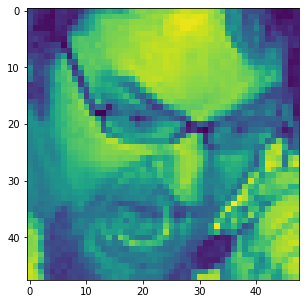

In [ ]:
sample_img = '/content/drive/MyDrive/Datasets/FER-2013/val/anger/PrivateTest_10131363.jpg'
pic = imageio.imread(sample_img)
plt.figure(figsize = (5,5))
plt.imshow(pic)

In [ ]:
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Dimension of Image: {}'.format(pic.ndim))
print('Image size: {}'.format(pic.size)) 
print('Maximum channel value in this image: {}'.format(pic.max())) 
print('Minimum channel value in this image: {}'.format(pic.min()))

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (48, 48)
Dimension of Image: 2
Image size: 2304
Maximum channel value in this image: 229
Minimum channel value in this image: 3


In [ ]:
train_ch = channels_distribution(data_train_fer)
val_ch = channels_distribution(data_val_fer)

if len(train_ch) == len(val_ch):
  tot_ch = [0 for i in range(len(train_ch))]
  for i in range(0, len(train_ch)):
     tot_ch[i] = train_ch[i] + val_ch[i]

print('Total channels distribution :', tot_ch)

Total channels distribution : [0, 0, 35953, 0, 0]


In [ ]:
# Resize FER-2013 training images in 224x224 and put the result in the final dataset

format_fer = "jpg"
source_type = "fer_2013"

destinations = ["/content/drive/MyDrive/Datasets/AVFER/train/" + class_ + "/" for class_ in fer_classes_t]
sources = ["/content/drive/MyDrive/Datasets/FER-2013/train/" + class_ for class_ in fer_classes_t]

for i in range(0,len(destinations)):
  iw.format_converter(sources[i], format_fer, source_type, destinations[i])

In [ ]:
# Resize FER-2013 validation images in 224x224 and put the result in the final dataset

sources = ["/content/drive/MyDrive/Datasets/FER-2013/val/" + class_ + "/" for class_ in fer_classes_t]
source_type = "fer_2013_test"

for i in range(0, len(destinations)):
  iw.format_converter(sources[i], format_fer, source_type, destinations[i])

In [ ]:
num_classes = 7

data_dir_ck = '/content/drive/My Drive/Datasets/CK+48/*'
ck_classes_t = iw.list_classes(data_dir_ck)
ck_classes_t

In [ ]:
ck_tot = iw.counter_samples(data_dir_ck)
print("Total no. of images in CK+: ", ck_tot)

The image size is 48x48. To retrieve some data in a standard format, we will try to resize them, maintaining pixels patterns for data processing. The new size is 224x224, which should maintain in a good way features of the samples. We will save the resized images in a new folder on the drive.

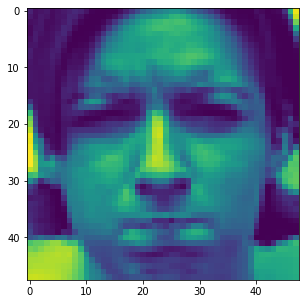

In [ ]:
sample_img = '/content/drive/MyDrive/Datasets/CK+48/anger/Copia di S010_004_00000017.png'
pic = imageio.imread(sample_img)
plt.figure(figsize = (5,5))
plt.imshow(pic)

In [ ]:
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Dimension of Image: {}'.format(pic.ndim))
print('Image size: {}'.format(pic.size)) 
print('Maximum channel value in this image: {}'.format(pic.max())) 
print('Minimum channel value in this image: {}'.format(pic.min()))

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (48, 48)
Dimension of Image: 2
Image size: 2304
Maximum channel value in this image: 255
Minimum channel value in this image: 0


In [ ]:
print('Total channels distribution :', channels_distribution(data_dir_ck))

Total channels distribution : [0, 0, 986, 0, 0]


In [ ]:
# Resize images and put the result in the final dataset

format_ck = "png"
source_type = "ck_plus"

destinations = ["/content/drive/MyDrive/Datasets/AVFER/train/" + class_ + "/" for class_ in ck_classes_t]
sources = ["/content/drive/MyDrive/Datasets/CK+48/" + class_ for class_ in ck_classes_t]

for i in range(0,len(destinations)):
  iw.format_converter(sources[i], format_ck, source_type, destinations[i])

In [ ]:
num_classes = 8

data_train_af = '/content/drive/My Drive/Datasets/AffectNet/train_class/*'
data_val_af = '/content/drive/My Drive/Datasets/AffectNet/val_class/*'

af_classes_t = iw.list_classes(data_train_af)
af_classes_v = iw.list_classes(data_val_af)

In [ ]:
af_train_tot = iw.counter_samples(data_train_af)
af_val_tot = iw.counter_samples(data_val_af)
af_tot = af_train_tot + af_val_tot
print("Total no. of images in AffectNet: ", af_tot)
print("Total no. of train images in AffectNet:", af_train_tot)
print("Total no. of val images in AffectNet:", af_val_tot)

Total no. of images in AffectNet:  41591
Total no. of train images in AffectNet: 37591
Total no. of val images in AffectNet: 4000


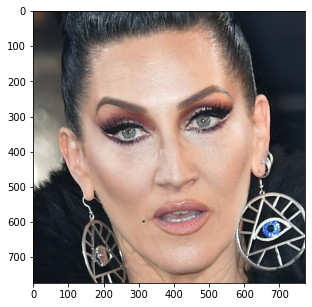

In [ ]:
sample_affectnet = '/content/drive/MyDrive/Datasets/AffectNet/train_class/anger/Copia di image0000006.jpg'
pic = imageio.imread(sample_affectnet)
plt.figure(figsize = (5,5))
plt.imshow(pic)

In [ ]:
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Hight {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (773, 773, 3)
Image Hight 773
Image Width 773
Dimension of Image 3


In [ ]:
print('Image size {}'.format(pic.size)) 
print('Maximum RGB value in this image {}'.format(pic.max())) 
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 1792587
Maximum RGB value in this image 255
Minimum RGB value in this image 0


Check values of a center pixel of the image, we will obtains values related to each RGB channels

In [ ]:
print('Value of only R channel {}'.format(pic[387, 387, 0])) 
print('Value of only G channel {}'.format(pic[387, 387, 1])) 
print('Value of only B channel {}'.format(pic[387, 387, 2]))

Value of only R channel 224
Value of only G channel 196
Value of only B channel 184


In [ ]:
# checking possible sizes of the matrix of pixels 
sizes = {}
for subfolder in glob.glob("/content/drive/MyDrive/Datasets/AffectNet/*"):
  for cl in glob.glob(subfolder + "/*"):
    for fl in glob.glob(cl + "/*"):
      img_pic = imageio.imread(fl)
      pixels = img_pic.shape[0] * img_pic.shape[1]
      sizes[pixels+""] += 1

for key in sizes.keys():
  print('Images with {} pixels are: {}'.format(key, sizes[key]))


In [ ]:
train_ch = channels_distribution(data_train_af)
val_ch = channels_distribution(data_val_af)

if len(train_ch) == len(val_ch):
  tot_ch = [0 for i in range(len(train_ch))]
  for i in range(0, len(train_ch)):
     tot_ch[i] = train_ch[i] + val_ch[i]

print('Total channels distribution :', tot_ch)

Total channels distribution : [0, 0, 0, 41591, 0]


In [ ]:
# Format of the image in the AffectNet
format_affectnet = "jpg"
source_type = "affect_net"

# We pass the AffectNet dataset in the validation set to balance it in the validation and testing subset
# Given a size bigger than CK+48 and FER-2013, we can use only a part in training and mantains the 
# rest in the testing and validation (only a small part related to the training set)
destinations = ["/content/drive/MyDrive/Datasets/AVFER/val/" + class_ + "/" for class_ in af_classes_t]
sources = ["/content/drive/MyDrive/Datasets/AffectNet/train_class/" + class_ + "/" for class_ in af_classes_t]


for i in range(0,len(destinations)):
  iw.format_converter(sources[i], format_affectnet, source_type, destinations[i])

In [ ]:
source_type = "affectnet_2"

destinations = ["/content/drive/MyDrive/Datasets/AVFER/test/" + class_ + "/" for class_ in af_classes_t]
sources = ["/content/drive/MyDrive/Datasets/AffectNet/val_class/" + class_ for class_ in af_classes_t]

for i in range(0,len(destinations)):
  iw.format_converter(sources[i], format_affectnet, source_type, destinations[i])


In [ ]:
num_classes = 8
data_avfer = []
base_directory = "/content/drive/My Drive/Datasets/AVFER/*"
sets = iw.list_classes(base_directory)
i = 0

print('Division of AVFER: ')
for subset in sets:
  data_avfer.append('/content/drive/My Drive/Datasets/AVFER/' + subset + '/*')
  print(data_avfer[i])
  i = i + 1

Division of AVFER: 
/content/drive/My Drive/Datasets/AVFER/train/*
/content/drive/My Drive/Datasets/AVFER/val/*
/content/drive/My Drive/Datasets/AVFER/test/*


In [ ]:
avfer_tot = 0
i = 0
print(data_avfer[0])

total = 0
for i in range(3):
  base_directory = data_avfer[i][:len(data_avfer[i])-1]
  counter_folder = 0
  for cl in os.listdir(base_directory):
    for fl in os.listdir(base_directory + cl + "/"):
      counter_folder += 1
  print(f'Elements in {data_avfer[i][:len(data_avfer[i])-1]} are {counter_folder}')
  total += counter_folder
print("Total elements in the dataset is", total)

/content/drive/My Drive/Datasets/AVFER/train/*
Elements in /content/drive/My Drive/Datasets/AVFER/train/ are 36855
Elements in /content/drive/My Drive/Datasets/AVFER/val/ are 37591
Elements in /content/drive/My Drive/Datasets/AVFER/test/ are 4000
Total elements in the dataset is 78446


## 3. Data Analysis


### 3.1 Data Analysis on AVFER
First of all, we need to check the amount of png and jpg on the training set. Actually, validation and testing set are in jpg image format due to the AffectNet splitting

In [ ]:
basedir = "/content/drive/MyDrive/Datasets/AVFER/*"
subsets = [dir for dir in glob.glob(basedir)]
df = pd.DataFrame(data={"class" : [], "jpg" : [], "png" : [], "set" : []})

for dir in subsets:
  classes = [cl for cl in glob.glob(dir + "/*")]
  for cl in classes:
    st = os.path.basename(dir)
    cls = os.path.basename(cl)
    png = iw.counter_file_extension(cl, "png")
    jpg = iw.counter_file_extension(cl, "jpg")
    df2 = pd.DataFrame(data={
          "class" : [cls], 
          "jpg" : [jpg], 
          "png" : [png], 
          "set" : [st]
    }) 
    df = pd.concat([df, df2], ignore_index = True, axis = 0)

df.head()

,class,jpg,png,set
0,happy,8989.0,207.0,train
1,surprise,4048.0,249.0,train
2,neutral,6198.0,0.0,train
3,fear,5131.0,75.0,train
4,disgust,547.0,177.0,train


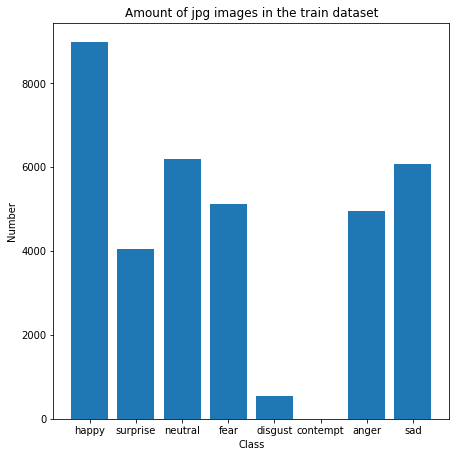

In [ ]:
def plt_set(typed, format):
  fig = plt.figure(figsize=(5.5,5.5))
  ax = fig.add_axes([0,0,1,1])
  cp = df[df['set'] == typed]
  ax.bar(cp['class'], 
       cp[format])
  plt.title(f'Amount of {format} images in the {typed} dataset')
  plt.ylabel('Number')
  plt.xlabel('Class')
  plt.show()  
plt_set('train', 'jpg')

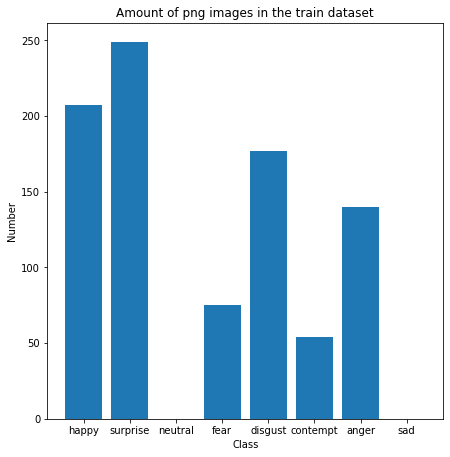

In [ ]:
plt_set('train', 'png')

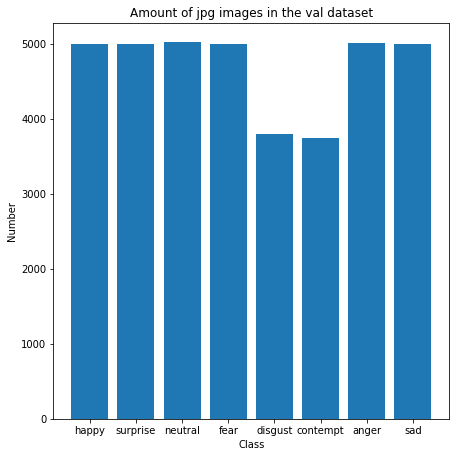

In [ ]:
plt_set('val', 'jpg') # AffectNet didn't have png

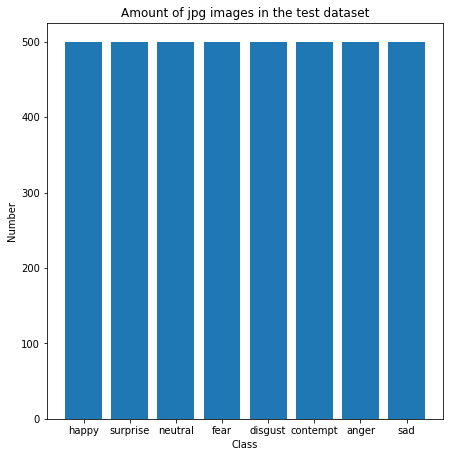

In [ ]:
plt_set('test', 'jpg') # AffectNet didn't have png

## 4. Loading and Balancing Datasets

In [ ]:
!mkdir /content/drive/MyDrive/Datasets/AVFER/tmp

In [ ]:
import sys
basedir = "/content/drive/MyDrive/Datasets/AVFER/"
types = ['val', 'test', 'train']
ref = [str(basedir  + types[i] + "/*") for i in range(len(types))]
total = 0
for el in ref:
  total += iw.counter_samples(el)

# Splitting ratio 100 :-> 80/20 (train/test) and 80 :-> 90/10 (train/val)
train_ratio = 80
val_ratio = 10
test_ratio = 20

# Splitting distribution
val_amount = int((((total * train_ratio) / 100) * 10 / 100))
test_amount = int((total * test_ratio)/ 100)
train_amount = int(total - (val_amount + test_amount))
print('Amount of samples per class for validation set:', val_amount) 
print('Amount of samples per class for testing set:', test_amount) 
print('Amount of samples per class for training set:', train_amount) 

# check augmentation of 3 
augm_train = train_amount * 3
print('Amount of augmented training set: ', augm_train)
print('Amount of samples for augmented training set divided by classes:', int(augm_train / 8))
print('Amount of samples for validation set divided by classes:', int(val_amount / 8))
print('Amount of samples for testing set divided by classes:', int(test_amount / 8))

# validation balancing 
val = ref[0]
min = sys.maxsize
countcl = iw.counter_samples_on_class(val)
for el in countcl.keys():
  if countcl[el] < min:
    min = countcl[el]

if min < (val_amount / 8):
  print('Error, the amount of samples for the validation set can\'t be reduce to minimum values')

classes = iw.list_classes(val)
residual = {}
for cl in classes:
  residual[cl] = countcl[cl] - ((val_amount / 8) + (test_amount / 8))

Amount of samples per class for validation set: 6275
Amount of samples per class for testing set: 15689
Amount of samples per class for training set: 56482
Amount of augmented training set:  169446
Amount of samples for augmented training set divided by classes: 21180
Amount of samples for validation set divided by classes: 784
Amount of samples for testing set divided by classes: 1961


In [ ]:
for cl in classes:
  os.mkdir(basedir + "tmp/" + cl + "/")

In [ ]:
import shutil

# check validation preconditions
print('Verify the correct amount for validation...')
err = False
for cl in classes:
  if countcl[cl] - residual[cl] - (test_amount / 8) < (val_amount / 8):
    print(f'Error, the residual amount put class {cl} to illegal value')
    err = True

if not err:
  print('Splitting possible.')

# splittig training and validation set according to the proportion previously calculated.
valdir = basedir + ref[0] + "/"
traindir = basedir + ref[2] + "/"
for cl in classes:
  c = 0
  for fl in glob.glob(valdir + cl + "/*"):
    if c < int(residual[cl]):
      c += 1
      shutil.copyfile(fl, os.path.join(traindir + cl, os.path.basename(fl)))
      os.remove(os.path.join(valdir + cl, os.path.basename(fl)))
    else:
      break

# done

Verify the correct amount for validation...
Splitting possible.


We put the residual samples of AffectNet from validation set to training set. The current amount of samples in the validation set is the sum of validation and testing validation. If we want to be sure that the splitting is doing correctly, we will execute the followings checking.

In [ ]:
# check testing splitting preconditions
residual_test = {}
print('Verify the correct amount for testing...')
for cl in classes:
  residual_test[cl] = countcl[cl] - residual[cl]
  if residual_test[cl] - (test_amount / 8) < (val_amount / 8):
    print(f'Error, the residual amount put class {cl} to illegal value')
    err = True

if not err:
  print('Splitting possible.')


print('Current status of the validation set:')
print('-'*60)
valdir = ref[0]
clcount = iw.counter_samples_on_class(valdir)
res = 0
for cl in classes:
  print(f'Total amount of {cl} samples in validation samples:', clcount[cl])
  res = clcount[cl] - int((test_amount / 8))
  print(f'Residual amount after last splitting {res}')
print('-'*60)
print(f'Final total amount of samples in the validation set:', res * 8)

Verify the correct amount for testing...
Splitting possible.
Current status of the validation set:
------------------------------------------------------------
Total amount of happy samples in validation samples: 5000
Residual amount after last splitting 3039
Total amount of surprise samples in validation samples: 5000
Residual amount after last splitting 3039
Total amount of neutral samples in validation samples: 5030
Residual amount after last splitting 3069
Total amount of fear samples in validation samples: 5000
Residual amount after last splitting 3039
Total amount of disgust samples in validation samples: 3803
Residual amount after last splitting 1842
Total amount of contempt samples in validation samples: 3750
Residual amount after last splitting 1789
Total amount of anger samples in validation samples: 5008
Residual amount after last splitting 3047
Total amount of sad samples in validation samples: 5000
Residual amount after last splitting 3039
---------------------------------

In [ ]:
valdir = basedir + "val" + "/"
testdir = basedir + "tmp" + "/"

for cl in classes:
  c = 0
  for fl in glob.glob(valdir + cl + "/*"):
    if c < int((test_amount / 8)):
      c += 1
      shutil.copyfile(fl, os.path.join(testdir + cl, os.path.basename(fl)))
      os.remove(os.path.join(valdir + cl, os.path.basename(fl)))
    else:
      break

print('Splitting completed')

Splitting completed


In [ ]:
for cl in classes:
  shutil.rmtree(basedir + "tmp/" + cl + "/")
os.rmdir(basedir + "tmp/")

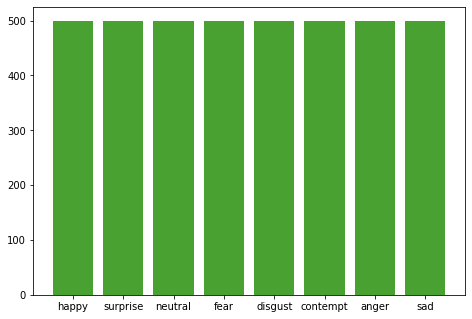

In [ ]:
testdir = "/content/drive/MyDrive/Datasets/AVFER/test"
plot_dataset(testdir + "/*")

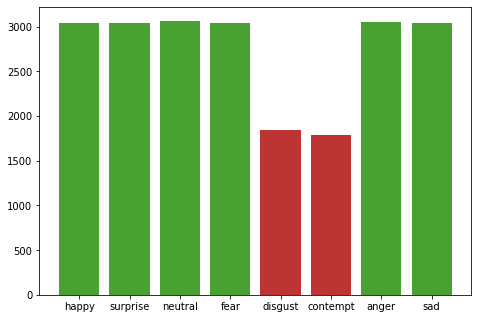

In [ ]:
valdir = "/content/drive/MyDrive/Datasets/AVFER/val"
plot_dataset(valdir + "/*")

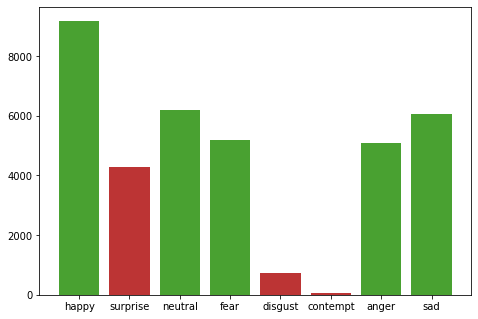

In [ ]:
traindir = "/content/drive/MyDrive/Datasets/AVFER/train"
plot_dataset(traindir + "/*")

In [ ]:
iw.counter_samples(traindir + "/*")

36855

In [ ]:
quantities = iw.counter_samples_on_class(valdir + "/*")
for cl in quantities.keys():
  print('Amount for class {} is {}'.format(cl, quantities[cl]))

Amount for class happy is 3039
Amount for class surprise is 3039
Amount for class neutral is 3069
Amount for class fear is 3039
Amount for class disgust is 1842
Amount for class contempt is 1789
Amount for class anger is 3047
Amount for class sad is 3039


In [ ]:
counters = iw.counter_samples_on_class(valdir + "/*")
for key in counters.keys():
  print(f'The current amount for the class {key} is {counters[key]}')
print('-'*40)
print('Balance it as well as the testing set...')
residual = 680
for cl in glob.glob(valdir + "/*"):
  total = counters[os.path.basename(cl)]
  count = total - residual
  print("{}: {} -> {} with residual of {}".format(os.path.basename(cl), total, count, total - count ))
  for fl in glob.glob(cl + "/*"):
    if count != 0:
      count = count - 1
      shutil.copyfile(fl, os.path.join(traindir,os.path.basename(cl), os.path.basename(fl)))
      os.remove(fl)
    else:
      break

print('Balanced completed.')
print('-'*40)

The current amount for the class happy is 3039
The current amount for the class surprise is 3039
The current amount for the class neutral is 3069
The current amount for the class fear is 3039
The current amount for the class disgust is 1842
The current amount for the class contempt is 1789
The current amount for the class anger is 3047
The current amount for the class sad is 3039
----------------------------------------
Balance it as well as the testing set...
happy: 3039 -> 2359 with residual of 680
surprise: 3039 -> 2359 with residual of 680
neutral: 3069 -> 2389 with residual of 680
fear: 3039 -> 2359 with residual of 680
disgust: 1842 -> 1162 with residual of 680
contempt: 1789 -> 1109 with residual of 680
anger: 3047 -> 2367 with residual of 680
sad: 3039 -> 2359 with residual of 680
Balanced completed.
----------------------------------------


## 5. Data Pre-processing

In [ ]:
path = "/content/drive/MyDrive/Datasets/AVFER/"

# checking the number of channels 

total = [0,0] # 0 for 1 channel, 1 for 3 channels
for path in glob.glob(path + "*"):
  for cl in glob.glob(path + "/*"):
    counter = [0,0] # 0 for 1 channel, 1 for 3 channels
    for fl in glob.glob(cl + "/*"):
      image = cv2.imread(fl)
      if(len(image.shape)<2):
        counter[0] += 1
        conv = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if len(image.shape)==3:
          cv2.imwrite(fl, image)
      else:
        counter[1] += 1
    total = [total[i] + counter[i] for i in range(2)]

total



[0, 62758]

In [ ]:
path = "/content/drive/MyDrive/Datasets/AVFER/"
total = [0,0] # 0 for 1 channel, 1 for 3 channels

for path in glob.glob(path + "*"):
  for cl in glob.glob(path + "/*"):
    counter = [0,0] # 0 for 1 channel, 1 for 3 channels
    for fl in glob.glob(cl + "/*"):
      image = cv2.imread(fl)
      if(len(image.shape)<2):
        counter[0] += 1
      else:
        counter[1] += 1
    total = [total[i] + counter[i] for i in range(2)]

total 

[0, 62758]

In [ ]:
image = Image.open('/content/drive/MyDrive/Datasets/FER-2013/train/anger/Training_10118481.jpg')
image.mode # L is gray-scale

'L'

In [ ]:
# test image in L mode
test = '/content/drive/MyDrive/Datasets/FER-2013/train/anger/Training_10118481.jpg'
pic = imageio.imread(test)
image = Image.open(test)

# convert to RGB
image = image.convert('RGB')
im_rgb = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
# temporal saving 
tmp = '/content/test.jpg'
image.save(tmp)
pic2 = imageio.imread(tmp)

# remove temporal image
os.remove(tmp)

# plot the result and compare with converted RGB and original RGB version
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15,5)) 
ax1, ax2 = ax
ax1.imshow(im_rgb[ :, :])
ax2.imshow(pic2[:,:,:])

In [ ]:
pic3 = imageio.imread("/content/drive/MyDrive/Datasets/AffectNet/train_class/anger/Copia di image0000006.jpg")
pic3[0] # Array of pixel values for a colored image

Array([[94, 68, 53],
       [91, 65, 50],
       [93, 67, 52],
       ...,
       [37, 43, 55],
       [36, 42, 54],
       [36, 42, 54]], dtype=uint8)

In [ ]:
im_rgb[0] # Array of pixels values for a gray-scaled image 

array([[ 50,  50,  50],
       [ 32,  32,  32],
       [ 15,  15,  15],
       [ 11,  11,  11],
       [ 12,  12,  12],
       [ 10,  10,  10],
       [ 10,  10,  10],
       [  8,   8,   8],
       [ 15,  15,  15],
       [ 10,  10,  10],
       [  7,   7,   7],
       [  7,   7,   7],
       [  6,   6,   6],
       [  5,   5,   5],
       [  5,   5,   5],
       [  6,   6,   6],
       [  8,   8,   8],
       [  4,   4,   4],
       [  6,   6,   6],
       [ 10,  10,  10],
       [  3,   3,   3],
       [  6,   6,   6],
       [ 13,  13,  13],
       [  4,   4,   4],
       [  8,   8,   8],
       [ 11,  11,  11],
       [ 15,  15,  15],
       [ 10,  10,  10],
       [  6,   6,   6],
       [  8,   8,   8],
       [  7,   7,   7],
       [  8,   8,   8],
       [  6,   6,   6],
       [ 19,  19,  19],
       [ 19,  19,  19],
       [ 22,  22,  22],
       [ 20,  20,  20],
       [ 22,  22,  22],
       [ 47,  47,  47],
       [ 61,  61,  61],
       [ 42,  42,  42],
       [ 55,  55

In [ ]:
# Array of pixels values for 3 channels adaptation of the gray-scale image
pic2[0]

Array([[ 57,  57,  57],
       [ 31,  31,  31],
       [ 11,  11,  11],
       [ 11,  11,  11],
       [ 14,  14,  14],
       [  8,   8,   8],
       [  6,   6,   6],
       [ 10,  10,  10],
       [ 17,  17,  17],
       [ 10,  10,  10],
       [  0,   0,   0],
       [  3,   3,   3],
       [ 12,  12,  12],
       [  5,   5,   5],
       [  0,   0,   0],
       [  8,   8,   8],
       [  6,   6,   6],
       [  8,   8,   8],
       [  0,   0,   0],
       [ 12,  12,  12],
       [  8,   8,   8],
       [  0,   0,   0],
       [ 15,  15,  15],
       [  0,   0,   0],
       [ 11,  11,  11],
       [ 12,  12,  12],
       [ 12,  12,  12],
       [ 10,  10,  10],
       [  7,   7,   7],
       [  6,   6,   6],
       [  7,   7,   7],
       [  9,   9,   9],
       [ 11,  11,  11],
       [ 14,  14,  14],
       [ 20,  20,  20],
       [ 23,  23,  23],
       [ 20,  20,  20],
       [ 23,  23,  23],
       [ 42,  42,  42],
       [ 64,  64,  64],
       [ 43,  43,  43],
       [ 53,  53

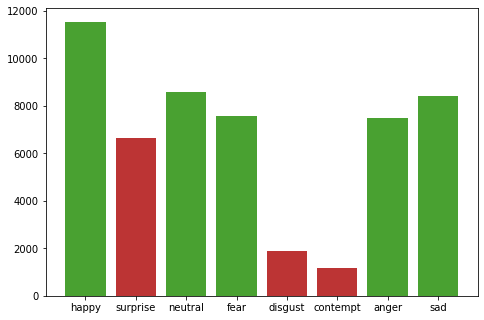

In [ ]:
traindir = "/content/drive/MyDrive/Datasets/AVFER/train"
plot_dataset(traindir + "/*")

In [ ]:
ref = "/content/drive/MyDrive/Datasets/AVFER/train"

for cl in glob.glob(ref + "/*"):
  print("Convert from class {}".format(cl))
  for fl in glob.glob(cl + "/*"):
    if fl[len(fl)-4:len(fl)] == '.png':
      os.rename(fl, str(fl[0:len(fl)-4]) + ".jpg")

Convert from class /content/drive/MyDrive/Datasets/AVFER/train/happy
Convert from class /content/drive/MyDrive/Datasets/AVFER/train/surprise
Convert from class /content/drive/MyDrive/Datasets/AVFER/train/neutral
Convert from class /content/drive/MyDrive/Datasets/AVFER/train/fear
Convert from class /content/drive/MyDrive/Datasets/AVFER/train/disgust
Convert from class /content/drive/MyDrive/Datasets/AVFER/train/contempt
Convert from class /content/drive/MyDrive/Datasets/AVFER/train/anger
Convert from class /content/drive/MyDrive/Datasets/AVFER/train/sad


In [ ]:
ref = "/content/drive/MyDrive/Datasets/AVFER/train"

counter = 0

for cl in glob.glob(ref + "/*"):
  print("Counting png on class {}".format(cl))
  for fl in glob.glob(cl + "/*"):
    if fl[len(fl)-4:len(fl)] == '.png':
      counter += 1

print('Remaining png samples: {}'.format(counter))

Counting png on class /content/drive/MyDrive/Datasets/AVFER/train/happy
Counting png on class /content/drive/MyDrive/Datasets/AVFER/train/surprise
Counting png on class /content/drive/MyDrive/Datasets/AVFER/train/neutral
Counting png on class /content/drive/MyDrive/Datasets/AVFER/train/fear
Counting png on class /content/drive/MyDrive/Datasets/AVFER/train/disgust
Counting png on class /content/drive/MyDrive/Datasets/AVFER/train/contempt
Counting png on class /content/drive/MyDrive/Datasets/AVFER/train/anger
Counting png on class /content/drive/MyDrive/Datasets/AVFER/train/sad
Remaining png samples: 0


Renaming the source folders for augmentation, only train is considered.

In [ ]:
# renaming files pre-augmentation

testdir = "/content/drive/MyDrive/Datasets/AVFER/train"
for cl in glob.glob(testdir + "/*"):
  counter = 0
  for img in glob.glob(cl + "/*"):
      os.rename(img, cl + "/" + os.path.basename(cl) + "-" + str(counter) + "-file" + img[len(img) - 4 : len(img)])
      counter += 1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def generator(path, 
              format_img, 
              dest_path,
              starting_counter=0, 
              num_augment=1, 
              zoom_range=0.6, 
              brightness_range=(0.2,0.8),
              width_shift_range=0.2,
              height_shift_range=0.2,
              rotation_range=10
              ):
   gen = ImageDataGenerator(
            featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=rotation_range,
            width_shift_range=width_shift_range,
            height_shift_range=height_shift_range,
            brightness_range=brightness_range,
            zoom_range=zoom_range,
            horizontal_flip=True
            )
   print(f'Data Augmentation parameters:\nZoom Range: {zoom_range}\nBrighness Range: {brightness_range}\nShift: ({width_shift_range},{height_shift_range})\nRotation Degrees: {rotation_range}')
   if iw.navigate_path(dest_path) == 0:
      try:
        os.mkdir(dest_path)
      except FileExistsError:
        pass
   num_el = iw.navigate_path(dest_path)
   c = starting_counter
   print('Starting generation...')
   for file in glob.glob(path + "/*." + format_img):
      img = cv2.imread(file)
      # convert to numpy array
      # expand dimension to one sample
      samples = np.expand_dims(img, 0)
      iterator = gen.flow(samples, batch_size=1)
      for i in range(0, num_augment):
          batch = iterator.next()
          image = batch[0].astype('uint8')
          cv2.imwrite(dest_path + "augmented_on_" + str(num_el) + "_" + str(c) + "."+ format_img, image)
          c += 1
   print(f'Data Augmentation for the {path} is done!')

In [ ]:
!rm -rf /content/drive/MyDrive/Datasets/AVFER/train/.ipynb_checkpoints

The total amount of copies for each samples depends on the total amount of images for its class. We can calculate the number of copies N as follow:
$ C(i) = T \div N(i) + 1 $ $ \forall i \in classes.keys()$

With $ T $ the total amount of samples that we want for each class, it is equal to 20.000, $ N(i) $ the initial amount of samples for the class $ i $ and $C(i)$ the final amount of data of the class $ i $ after the augmentation phase.


In [ ]:
augm_class = []
copies = {}
categories_data = iw.counter_samples_on_class("/content/drive/MyDrive/Datasets/AVFER/train/*")

for cl in categories_data.keys():
  copies[cl] = int(20000/categories_data[cl]) + 1


In [ ]:
for class_ in categories_data.keys():
  print('Generation of {} samples with {} copy...'.format(class_, copies[class_]))
  generator("/content/drive/MyDrive/Datasets/AVFER/train/" + class_, "jpg", "/content/drive/MyDrive/Datasets/AVFER/train/" + class_ + "/", 0, num_augment=copies[class_])

Generation of happy samples with 2 copy...
Data Augmentation parameters:
Zoom Range: 0.6
Brighness Range: (0.2, 0.8)
Shift: (0.2,0.2)
Rotation Degrees: 10
Starting generation...


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Data Augmentation for the /content/drive/MyDrive/Datasets/AVFER/train/happy is done!
Generation of surprise samples with 4 copy...
Data Augmentation parameters:
Zoom Range: 0.6
Brighness Range: (0.2, 0.8)
Shift: (0.2,0.2)
Rotation Degrees: 10
Starting generation...
Data Augmentation for the /content/drive/MyDrive/Datasets/AVFER/train/surprise is done!
Generation of neutral samples with 3 copy...
Data Augmentation parameters:
Zoom Range: 0.6
Brighness Range: (0.2, 0.8)
Shift: (0.2,0.2)
Rotation Degrees: 10
Starting generation...
Data Augmentation for the /content/drive/MyDrive/Datasets/AVFER/train/neutral is done!
Generation of fear samples with 3 copy...
Data Augmentation parameters:
Zoom Range: 0.6
Brighness Range: (0.2, 0.8)
Shift: (0.2,0.2)
Rotation Degrees: 10
Starting generation...
Data Augmentation for the /content/drive/MyDrive/Datasets/AVFER/train/fear is done!
Generation of disgust samples with 11 copy...
Data Augmentation parameters:
Zoom Range: 0.6
Brighness Range: (0.2, 0.8

In [ ]:
!rm -rf /content/drive/MyDrive/Datasets/VFER/
!mkdir /content/drive/MyDrive/Datasets/VFER/
!mkdir /content/drive/MyDrive/Datasets/VFER/train
!mkdir /content/drive/MyDrive/Datasets/VFER/val
!mkdir /content/drive/MyDrive/Datasets/VFER/test

In [ ]:
base_dir = "/content/drive/MyDrive/Datasets/VFER/"
x = "/content/drive/MyDrive/Datasets/AffectNet/train_class/"
subfolders = [el for el in os.listdir(base_dir)]
classes = [cl for cl in os.listdir(x)]


for cl in classes:
  for folder in subfolders:
    os.mkdir(base_dir  + folder + "/" + cl)

In [ ]:
import shutil
# Dump balanced dataset to VFER from AVFER samples
source_folder = r"/content/drive/MyDrive/Datasets/AVFER/"
destination_folder = r"/content/drive/MyDrive/Datasets/VFER/"
cap_class = 20000
print('Start dataset copying...')
print('-'*40)
# fetch all files
for subfolder in os.listdir(source_folder):
  if subfolder == ".ipynb_checkpoints":
      print('Passing checkpoint files')
      continue
  print("Going in the subfolder {}".format(subfolder))
  for cl in os.listdir(source_folder + subfolder + "/"):
    print("Going in the class {}/{}".format(subfolder, cl))
    if cl == ".ipynb_checkpoints":
      print('Passing checkpoint files')
      continue
    else:
      counter_file = 0
      for file_name in glob.glob(source_folder  + subfolder + "/" + cl + "/*.jpg"):
        # construct full file path
        source = source_folder + subfolder + "/" + cl + "/" + os.path.basename(file_name)
        destination = destination_folder + subfolder + "/" + cl + "/" + os.path.basename(file_name)
        # copy only files
        if os.path.isfile(source) and counter_file < cap_class:
          counter_file += 1
          shutil.copy(source, destination)
        if counter_file > cap_class:
          break
  
      print('Copied on {}'.format(cl))

print('-'*40)
print('Dump done.')

Start dataset copying...
----------------------------------------
Going in the subfolder train
Going in the class train/happy
Copied on happy
Going in the class train/surprise
Copied on surprise
Going in the class train/neutral
Copied on neutral
Going in the class train/fear
Copied on fear
Going in the class train/disgust
Copied on disgust
Going in the class train/contempt
Copied on contempt
Going in the class train/anger
Copied on anger
Going in the class train/sad
Copied on sad
Going in the subfolder val
Going in the class val/happy
Copied on happy
Going in the class val/surprise
Copied on surprise
Going in the class val/neutral
Copied on neutral
Going in the class val/fear
Copied on fear
Going in the class val/disgust
Copied on disgust
Going in the class val/contempt
Copied on contempt
Going in the class val/anger
Copied on anger
Going in the class val/sad
Copied on sad
Going in the class val/.ipynb_checkpoints
Passing checkpoint files
Going in the subfolder test
Going in the class 

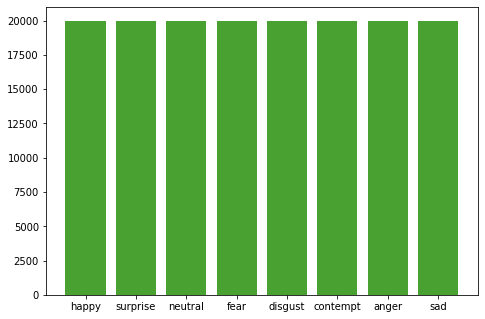

In [ ]:
plot_dataset("/content/drive/MyDrive/Datasets/VFER/train/*")

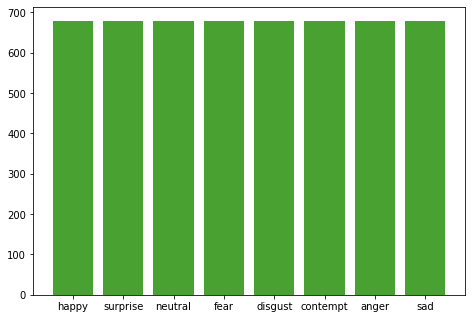

In [ ]:
plot_dataset("/content/drive/MyDrive/Datasets/VFER/val/*")

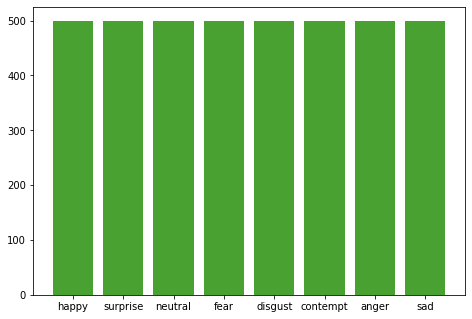

In [ ]:
plot_dataset("/content/drive/MyDrive/Datasets/VFER/test/*")

## 6. Training Transformer

In [ ]:
!pip install timm

     |████████████████████████████████| 431 kB 34.6 MB/s 


In [ ]:
import timm, torch, os
from torchvision import datasets, models, transforms

input_size = (224,224)
batch_size = 60

data_dir= "/content/drive/MyDrive/Datasets/VFER/"

In [ ]:
for fd in glob.glob("/content/drive/MyDrive/Datasets/VFER/*"):
  for cl in glob.glob(fd + "/.*"):
    os.rmdir(cl)


In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
}
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


print("Initializing Datasets and Dataloaders...")

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=8,pin_memory=True) for x in ['train', 'val']}

Initializing Datasets and Dataloaders...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from __future__ import print_function
from __future__ import division
from torch.optim import lr_scheduler
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
import time
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.11.0+cu113
Torchvision Version:  0.12.0+cu113


In [ ]:
NUM_CLASSES = 8
model = timm.create_model('vit_base_patch16_sam_224', pretrained=True)

In [ ]:
model.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU()
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,),

In [ ]:
model.head = nn.Linear(768, NUM_CLASSES)
model.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU()
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,),

In [ ]:
import pickle, sys


def save_history(history, filename):
  if os.path.isfile(filename):
    os.remove(filename)
  file_handler = open(filename + ".pkl", "wb")
  pickle.dump(history, file_handler)
  file_handler.close()


def load_history(filename):
  file_handler = open(filename + ".pkl", "rb")
  output = pickle.load(file_handler)
  file_handler.close()
  return output


def train_model(model, dataloaders, criterion, optimizer,lr_scheduler, num_epochs=25, is_inception=False, 
                is_loaded = False, load_state_ws=None, history_file_acc="history_accuracy",
                history_file_loss="history_loss", n_partial=0, model_folder="", ):
    
    history = {'val' : [], 'train' : []}
    loss_history = {'val' : [], 'train' : []}

    if is_loaded and load_state_ws != None:
      # load the model
      state_dict = torch.load(load_state_ws)
      model.load_state_dict(state_dict)
      model.eval()
      print('Model loaded correctly')
      # history = load_history(history_file_acc)
      # loss_history = load_history(history_file_loss)
      # print('History loaded')

    
    print('Starting Training')
    print('-' * 12)

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        epoch_since = time.time()
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 12)
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            total = len(dataloaders[phase])
            current = 0
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            dl = dataloaders[phase]
            totalIm=0
            # Iterate over data.
            for inputs, labels in dl:
                totalIm+=len(inputs)
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                      outputs = model(inputs)
                      loss = criterion(outputs, labels)

                      _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                      if phase == 'train':
                        loss.backward()
                        if type(optimizer) != SAM:
                          optimizer.step()
                        else:
                          def closure():
                            outputs = model(inputs)
                            _, preds = torch.max(outputs, 1)
                            loss = criterion(outputs, labels)
                            loss.backward()
                            return loss
                
                        optimizer.step(closure)

                        

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                epoch_loss = running_loss / totalIm
                epoch_acc = running_corrects.double() / totalIm
                # status update
                current += 1
                sys.stdout.write("\r" + f"{epoch + 1}/{num_epochs} - {phase} step : " + str(current * batch_size) + "/" +  str(total * batch_size) + " - " + 
                                 "{}_accuracy : ".format(phase) + "{:4f}".format(epoch_acc) + " - {}_loss : ".format(phase) + "{:4f}".format(epoch_loss))
                sys.stdout.flush()
            epoch_loss = running_loss / totalIm
            epoch_acc = running_corrects.double() / totalIm
            print() # avoid result cleaning 
            if phase == 'train':
              history['train'].append(epoch_acc)
              loss_history['train'].append(epoch_loss)

            # deep copy the model only in case the accusary is better in evaluation (local optima)
            local_optima = False
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                local_optima = True
            if phase == 'val':
                history['val'].append(epoch_acc)
                loss_history['val'].append(epoch_loss)

        # Increases the internal counter
        if lr_scheduler:            
            lr_scheduler.step()            
        lr = optimizer.param_groups[0]['lr']
        interval_epoch = time.time() - epoch_since 
        print('\nEpoch {} complete in. {:.0f}m {:.0f}s {} and with a learning rate of {}'.format(epoch + 1, interval_epoch // 60, interval_epoch % 60, "with best local accuracy" if local_optima else "",lr))
        save_history(loss_history, model_folder + os.path.basename(model_folder) + "_" + history_file_loss)
        
        torch.save(model.state_dict(), model_folder + "epoch_{}_{}".format(epoch + 1, os.path.basename(model_folder[:len(model_folder) - 1])))
        print("-" * 12)

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val accuracy: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, history['train'], history['val']

In [ ]:
!git clone https://github.com/davda54/sam.git

Cloning into 'sam'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 179 (delta 62), reused 53 (delta 53), pack-reused 104
Receiving objects: 100% (179/179), 650.16 KiB | 710.00 KiB/s, done.
Resolving deltas: 100% (84/84), done.


In [ ]:
optimizer_set = "SAM"

In [ ]:
from sam.sam import SAM
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# Send the model to GPU
model = model.to(device)
feature_extract=False

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model.parameters()
print("Params to learn:")

for name,param in model.named_parameters():
    if param.requires_grad == True:
          print("\t",name)

# stochasic gradient descent
lr_in = 0.01
momentum_in = 0.9
if optimizer_set == "SGD":
  optimizer_ft = optim.SGD(params_to_update, lr=lr_in, momentum=momentum_in)
else:
  optimizer_base = optim.SGD # define an optimizer for the "sharpness-aware" update
  optimizer_ft = SAM(params_to_update, optimizer_base, lr=lr_in, momentum=momentum_in)


cuda:0
Params to learn:
	 cls_token
	 pos_embed
	 patch_embed.proj.weight
	 patch_embed.proj.bias
	 blocks.0.norm1.weight
	 blocks.0.norm1.bias
	 blocks.0.attn.qkv.weight
	 blocks.0.attn.qkv.bias
	 blocks.0.attn.proj.weight
	 blocks.0.attn.proj.bias
	 blocks.0.norm2.weight
	 blocks.0.norm2.bias
	 blocks.0.mlp.fc1.weight
	 blocks.0.mlp.fc1.bias
	 blocks.0.mlp.fc2.weight
	 blocks.0.mlp.fc2.bias
	 blocks.1.norm1.weight
	 blocks.1.norm1.bias
	 blocks.1.attn.qkv.weight
	 blocks.1.attn.qkv.bias
	 blocks.1.attn.proj.weight
	 blocks.1.attn.proj.bias
	 blocks.1.norm2.weight
	 blocks.1.norm2.bias
	 blocks.1.mlp.fc1.weight
	 blocks.1.mlp.fc1.bias
	 blocks.1.mlp.fc2.weight
	 blocks.1.mlp.fc2.bias
	 blocks.2.norm1.weight
	 blocks.2.norm1.bias
	 blocks.2.attn.qkv.weight
	 blocks.2.attn.qkv.bias
	 blocks.2.attn.proj.weight
	 blocks.2.attn.proj.bias
	 blocks.2.norm2.weight
	 blocks.2.norm2.bias
	 blocks.2.mlp.fc1.weight
	 blocks.2.mlp.fc1.bias
	 blocks.2.mlp.fc2.weight
	 blocks.2.mlp.fc2.bias
	 blocks

In [ ]:
optimizer_ft

SAM (
Parameter Group 0
    adaptive: False
    dampening: 0
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    rho: 0.05
    weight_decay: 0
)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()
num_epochs = 10

# model general info
name_model = "vfer_sam_10"
base_dir = "/content/drive/MyDrive/Models/"

def mkdir_model(base_dir, name_model, counter):
  try:
    d = "{}/{}".format(base_dir,name_model)
    os.mkdir(d)
  except FileExistsError:
    counter += 1
    mkdir_model(base_dir, str(name_model) + "_" + str(counter), counter)

mkdir_model(base_dir, name_model, 0)

# model files for saving history and model data
model_folder = base_dir + name_model + "/"
model_file = model_folder + name_model + ".pth"
train_history = model_folder + name_model + "_" + "history_train"
val_history = model_folder + name_model + "_" + "history_val"


# Learning Rate schedule: decays the learning rate by a factor of `gamma` 
# every `step_size` epochs
scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

In [ ]:
# Train and evaluate
model, train_hist, val_hist = train_model(model, dataloaders_dict, criterion, optimizer_ft,scheduler, num_epochs=num_epochs, 
                                          is_inception=False)
#Saving the updated model for the inference phase
torch.save(model.state_dict(), model_file)

# Save histories data
save_history(train_hist, train_history)
save_history(val_hist, val_history)

Starting Training
------------
Epoch 1/10
------------
1/10 - train step : 24600/160020 - train_accuracy : 0.407114 - train_loss : 1.531723

In [ ]:
# model general info
name_model = "vfer_sam_20"
base_dir = "/content/drive/MyDrive/Models/"
mkdir_model(base_dir, name_model, 0)

# model files for saving history and model data
model_folder = base_dir + name_model + "/"
model_file = model_folder + name_model + ".pth"
train_history = model_folder + name_model + "_" + "history_train"
val_history = model_folder + name_model + "_" + "history_val"

# changing starting lr
lr_in = 0.0001
optimizer_ft = optim.SGD(model.parameters(), lr=lr_in, momentum=momentum_in)
scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

# Train and evaluate
model, train_hist, val_hist = train_model(model, dataloaders_dict, criterion, optimizer_ft,scheduler, num_epochs=num_epochs, 
                                          is_inception=False, is_loaded=True, model_folder= model_folder,
                                          load_state_ws="/content/drive/MyDrive/Models/vfer_sam_10/vfer_sam_10.pth" )


#Saving the updated model for the inference phase
torch.save(model.state_dict(), model_file)

# Save histories data
save_history(train_hist, train_history)
save_history(val_hist, val_history)

In [ ]:
# model general info
name_model = "vfer_sam_25"
base_dir = "/content/drive/MyDrive/Models/"
mkdir_model(base_dir, name_model, 0)

# model files for saving history and model data
model_folder = base_dir + name_model + "/"
model_file = model_folder + name_model + ".pth"
train_history = model_folder + name_model + "_" + "history_train"
val_history = model_folder + name_model + "_" + "history_val"

# updating num_epochs
num_epochs = 5
# changing starting lr
lr_in = 0.001
optimizer_ft = optim.SGD(model.parameters(), lr=lr_in, momentum=momentum_in)
scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

# Train and evaluate
model, train_hist, val_hist = train_model(model, dataloaders_dict, criterion, optimizer_ft,scheduler, num_epochs=num_epochs, 
                                          is_inception=False, is_loaded=True, model_folder= model_folder,
                                          load_state_ws="/content/drive/MyDrive/Models/vfer_sam_20/vfer_sam_20.pth" )


#Saving the updated model for the inference phase
torch.save(model.state_dict(), model_file)

# Save histories data
save_history(train_hist, train_history)
save_history(val_hist, val_history)

## 7. Evaluation

\In this section, we will evaluate the performances of our models based on the accuracy and loss values on the training and validation set with some histograms for the progress analysis during the training phase. 

In [ ]:
# plot and data management functions

def plot_graphs(train, val, metric):
    plt.plot(train)
    plt.plot(val, '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

def tensor_to_list(tensor_list):
  l = []
  for el in tensor_list:
    l.append(el.item())
  return l

In [ ]:
# load history divided by steps
steps = [10,20,25]
base_dir = "/content/drive/MyDrive/Models/"
train_accuracy = []
val_accuracy = []
train_loss = []
val_loss = []
for step in steps:
  name_model = "vfer_grad_" + str(step)
  model_folder = base_dir + name_model + "/"
  train_accuracy += tensor_to_list(load_history(model_folder + name_model + "_history_train"))
  val_accuracy += tensor_to_list(load_history(model_folder + name_model + "_history_val"))
  step_loss = load_history(base_dir + name_model + "/" + name_model + "_history_loss")
  train_loss += step_loss['train']
  val_loss += step_loss['val']

In [ ]:
# we need to merge them together
for i in range(len(train_accuracy)):
  train_accuracy[i] = round(train_accuracy[i], 2)
  val_accuracy[i] = round(val_accuracy[i], 2)
  val_loss[i] = round(val_loss[i], 2)
  train_loss[i] = round(train_loss[i], 2)

In [ ]:
# accuracy plot
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plot_graphs(train_accuracy, val_accuracy, 'accuracy')
plt.ylim(0, 1)

In [ ]:
# loss plot
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plot_graphs(train_loss, val_loss, 'loss')
plt.ylim(0, None)

In [ ]:
data_transforms_test = {
    'test': transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
}

# Create training and validation datasets
image_datasets_test = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms_test[x]) for x in ['test']}

# Create training and validation dataloaders
dataloaders_dict_test = {x: torch.utils.data.DataLoader(image_datasets_test[x], batch_size=batch_size, shuffle=False, num_workers=2,pin_memory=True) for x in [ 'test']}

In [ ]:
def test_model(model, dataloaders,   
                is_loaded = False, load_state_ws=None,
                  model_folder=""):
    final_scores = []
    overall_labels = []
    if is_loaded and load_state_ws != None:
      # load the model
      state_dict = torch.load(load_state_ws)
      model.load_state_dict(state_dict)
      model.eval()
      print('Model loaded correctly')
      print("Testing phase start...")
      total = len(dataloaders['test'])
      model = model.eval()   # Set model to evaluate mode
      dl = dataloaders['test']
      totalIm=0
      # Iterate over data.
      for inputs, labels in dl:
          totalIm+=len(inputs)
          inputs = inputs.to(device)
          labels = labels.to(device)
          # forward
          # track history if only in train
          with torch.set_grad_enabled(False):
              scores = model(inputs)
              #c oncatenating final scores and label list
              final_scores=[*final_scores,*scores.tolist()]
              overall_labels=[*overall_labels,*labels.tolist()]



    return final_scores,overall_labels

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#setting the path of the model to be imported
model_path='/content/drive/MyDrive/Models/vfer_grad_25/vfer_grad_25.pth'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# Send the model to GPU
model = model.to(device)
scores,labels = test_model(model, dataloaders_dict_test, True, load_state_ws=model_path) 

cuda:0
Model loaded correctly
Testing phase
